# Part II - (Ford Go Bike)
## by (Ebunoluwa Alabi)

## Investigation Overview


> I was interested in finding out the peak periods, the top users by user time and also the consumer behavior, How long do they ride for and when do they ride the most. I believe that these are useful insights for any business in expanding its marketing efforts or better understanding consumer analystics in general. In general the peak hours are between 7am - 9am and 4pm - 6pm. There are more male customers than female customers and there are more customers than subscribers 


## Dataset Overview

> The data consists of information regarding 183,000 rides made in a bike-sharing system covering the greater San Francisco Bay area. The data features include duration (secs) and others such as DateTime, customer type, gender, and some additional variables.

## Key Insights
> More men than women ride the bikes, more marketing effort can be carried out to better target the men, and more women can be convinced to start riding bikes too

> The most popular age range seems to be betweem 29 - 34 years old. Suggesting more millenials enjoy our product. I had to extract the age from the member_birth_year column.

> The duration_sec and member_age have no correlation to each other not even slightly, ideally I would have expected some correlation between age and duration, where older folks spend less time riding the bikes.

> Suprisingly more customers user the bikses than subscribers.  I would have expected that subscribers would be more active.
 
> Quite interestingly, even though there are way more men than women, women still use the bikes for a more time than men.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> More men than women ride the bikes, more marketing effort can be carried out to better target the men, and more women can be convinced to start riding bikes too
 

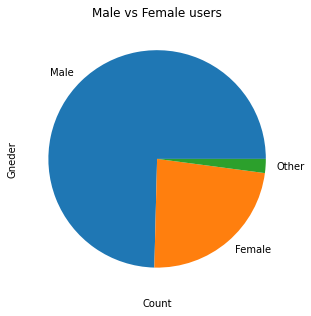

In [3]:
plt.figure(figsize=(5,5))

df_gender = df.groupby('member_gender').filter(lambda x: len(x) >= 1500)
df_gender ['member_gender'].value_counts().plot(kind = 'pie')
plt.title('Male vs Female users')
plt.xlabel('Count')
plt.ylabel('Gneder');

## (Visualization 2)

> The most popular age range seems to be betweem 29 - 34 years old. Suggesting more millenials enjoy our product. I had to extract the age from the member_birth_year column.

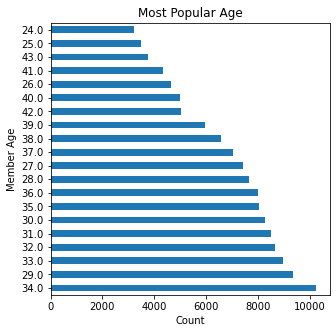

In [4]:
#clean data to get member age
df['member_age'] = 2022 - df['member_birth_year']
df['member_age'].value_counts()

plt.figure(figsize=(5,5))

df_birth = df.groupby('member_age').filter(lambda x: len(x) >= 3000)
df_birth ['member_age'].value_counts().plot(kind = 'barh')
plt.title('Most Popular Age')
plt.xlabel('Count')
plt.ylabel('Member Age');

## (Visualization 3)

> The duration_sec and member_age have no correlation to each other not even slightly, ideally I would have expected some correlation between age and duration, where older folks spend less time riding the bikes.

In [5]:
numeric_vars = ['start_time', 'duration_sec', 'member_age' ]
categoric_vars = ['user_type', 'member_gender', 'time_day', 'time_hour']

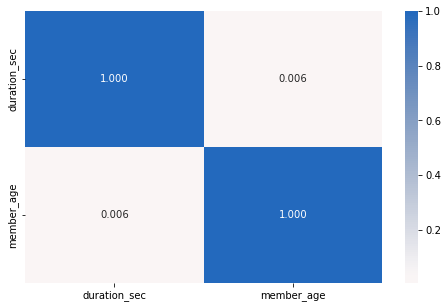

In [6]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()



## (Visualization 4)

> Suprisingly more customers user the bikses than subscribers.  I would have expected that subscribers would be more active.

,user_type,duration_sec
0,Customer,1432.465019
1,Subscriber,640.263678


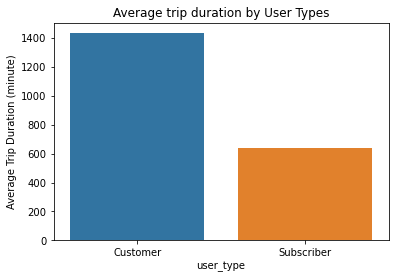

In [10]:
# Average trip duration mean plot
grouped_user_duration = df[['user_type','duration_sec']].groupby(['user_type'],as_index= False).mean()

display(grouped_user_duration)

sb.barplot(x='user_type', y='duration_sec', data=grouped_user_duration)
plt.title("Average trip duration by User Types")
plt.ylabel("Average Trip Duration (minute)")
plt.show()

## (Visualization 5)

> Quite interestingly, even though there are way more men than women, women still use the bikes for a more time than men.

,member_gender,duration_sec
0,Female,779.070390
1,Male,672.639069
2,Other,996.515334


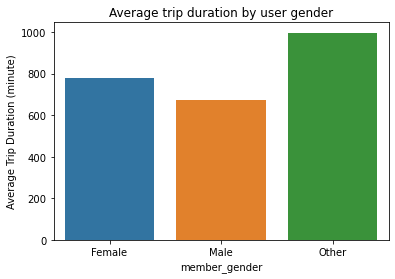

In [11]:
# Average trip duration mean plot
grouped_gender_duration = df[['member_gender','duration_sec']].groupby(['member_gender'],as_index= False).mean()
# show analysis
display(grouped_gender_duration)

sb.barplot(x='member_gender', y='duration_sec', data=grouped_gender_duration)
plt.title("Average trip duration by user gender")
plt.ylabel("Average Trip Duration (minute)")
plt.show()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [12]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `template_path` not recognized by `SlidesExporter`.  Did you mean one of: `extra_template_paths, template_name, template_paths`?
Traceback (most recent call last):
  File "/Users/ebunoluwaalabi/opt/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/Users/ebunoluwaalabi/opt/anaconda3/lib/python3.9/site-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/Users/ebunoluwaalabi/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/Users/ebunoluwaalabi/opt/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "/Users/ebunoluwaalabi/opt/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 536, in convert_notebooks
    self.exporter = cls(config=self.config)
  File "/Us

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 